In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

plt.style.use("ggplot")
sns.set_style("dark") 
sns.set_palette("Set2")

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('/Users/prathammehta/Downloads/Security Risk Detections_20250710-20250717 (2).csv')


## Data Cleaning
# Replace hyphens in 'Generated' with NaN before conversion
df['Generated'] = df['Generated'].replace('-', pd.NaT)

# Convert timestamp columns to datetime
df['Received'] = pd.to_datetime(df['Received'])
df['Generated'] = pd.to_datetime(df['Generated'])

# Calculate response time (Received - Generated)
df['Response_Time'] = (df['Received'] - df['Generated']).dt.total_seconds()

# Display the cleaned dataframe
print(df.head())
# Extract date and hour components for analysis
df['Date'] = df['Received'].dt.date
df['Hour'] = df['Received'].dt.hour
df['DayOfWeek'] = df['Received'].dt.day_name()

# Clean categorical columns
df['Category'] = df['Category'].str.strip()
df['Action/Result'] = df['Action/Result'].str.strip()
df['User'] = df['User'].str.strip()

# Extract domain from URLs for better analysis
def extract_domain(url):
    if pd.isna(url) or url == '-':
        return np.nan
    try:
        # Remove http/https
        domain = url.replace('https://', '').replace('http://', '')
        # Remove path and parameters
        domain = domain.split('/')[0]
        # Remove www. if present
        domain = domain.replace('www.', '')
        return domain
    except:
        return np.nan

df['Domain'] = df['Threat/Violation'].apply(extract_domain)



                   Received                 Generated       Category  \
0 2025-07-17 03:30:06-07:00 2025-07-17 03:21:00-07:00  URL Filtering   
1 2025-07-17 03:30:06-07:00 2025-07-17 03:20:00-07:00  URL Filtering   
2 2025-07-17 03:30:06-07:00 2025-07-17 03:20:00-07:00  URL Filtering   
3 2025-07-17 03:08:37-07:00 2025-07-17 03:02:00-07:00  URL Filtering   
4 2025-07-17 03:08:37-07:00 2025-07-17 03:01:00-07:00  URL Filtering   

                                    Threat/Violation File Path/Target  \
0  https://tpc.googlesyndication.com/simgad/12443...                -   
1  https://www.googleadservices.com/pagead/conver...                -   
2  https://www.googleadservices.com/pagead/conver...                -   
3                https://s.adroll.com/j/roundtrip.js                -   
4  https://bh.contextweb.com/bh/rtset?do=add&pid=...                -   

  Action/Result     Endpoint  Count             User  Response_Time  
0       Blocked  MHBM-LAP104      1       hari.chand      

In [2]:
## Exploratory Data Analysis

# 1. Basic Statistics
print("\n=== Basic Statistics ===")
print(f"Total records: {len(df)}")
print(f"Time range: {df['Received'].min()} to {df['Received'].max()}")
print("\nAction/Result counts:")
print(df['Action/Result'].value_counts())
print("\nCategory distribution:")
print(df['Category'].value_counts(normalize=True))


=== Basic Statistics ===
Total records: 3601
Time range: 2025-07-10 11:32:23-07:00 to 2025-07-17 03:30:06-07:00

Action/Result counts:
Action/Result
Blocked    3600
Cleaned       1
Name: count, dtype: int64

Category distribution:
Category
URL Filtering          0.815051
Web Reputation         0.169397
Application Control    0.013052
Device Control         0.002222
Spyware/Grayware       0.000278
Name: proportion, dtype: float64


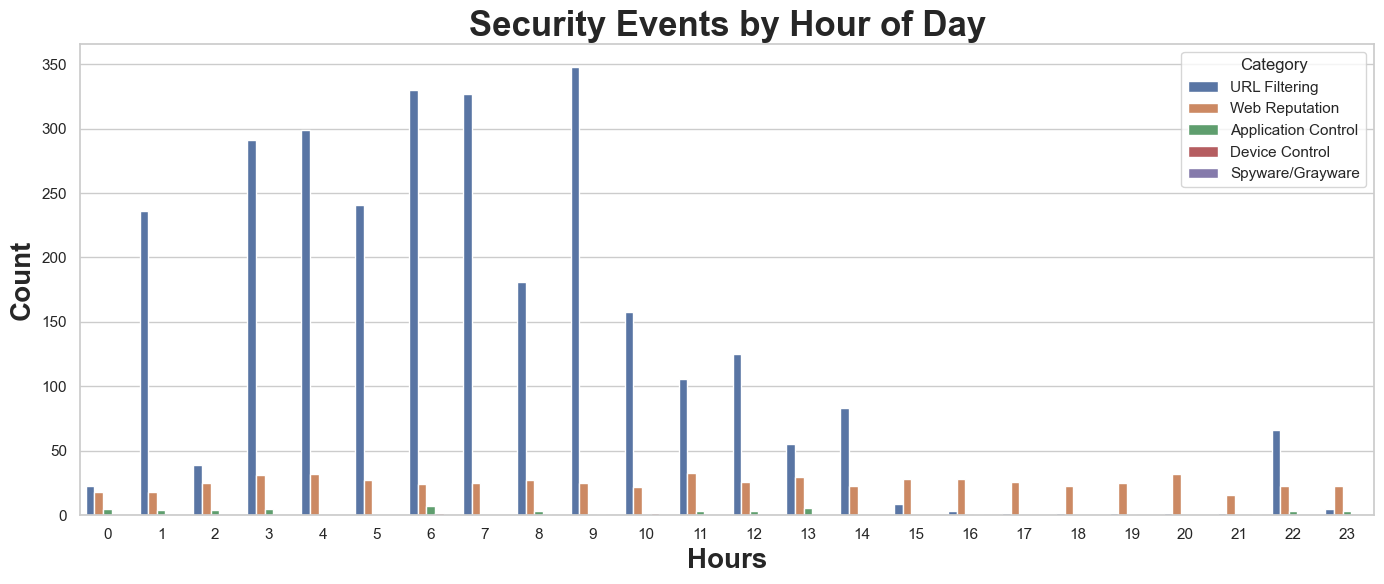

In [3]:
# 2. Temporal Analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Hour', hue='Category')
plt.xlabel("Hours", fontsize = 20, fontweight = "bold")
plt.ylabel("Count", fontsize = 20, fontweight = "bold")
plt.title('Security Events by Hour of Day', fontsize = 25, fontweight = "bold")
plt.tight_layout()

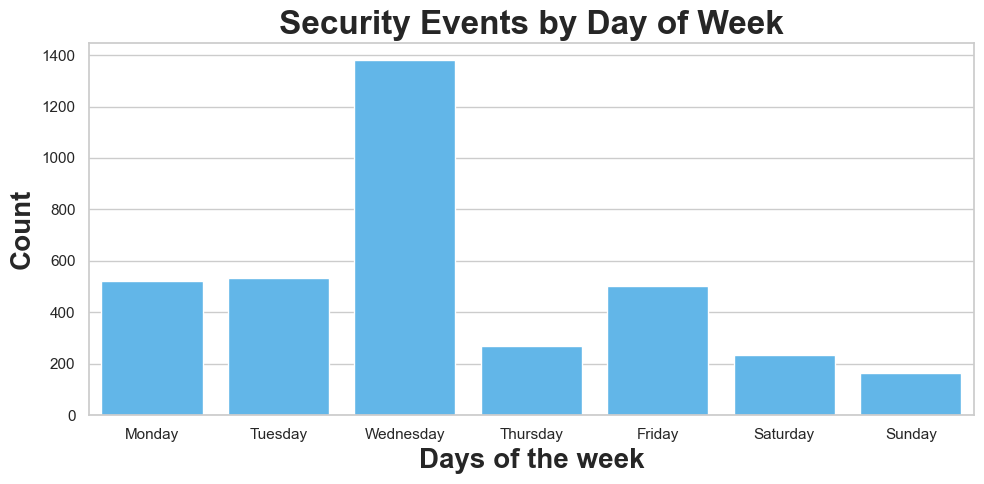

In [4]:
# Events by day of week
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], color ="#4cbcfe")
plt.title('Security Events by Day of Week', fontsize = 24, fontweight = "bold")
plt.xlabel("Days of the week", fontsize = 20, fontweight = "bold")
plt.ylabel("Count", fontsize = 20, fontweight = "bold")
plt.tight_layout()

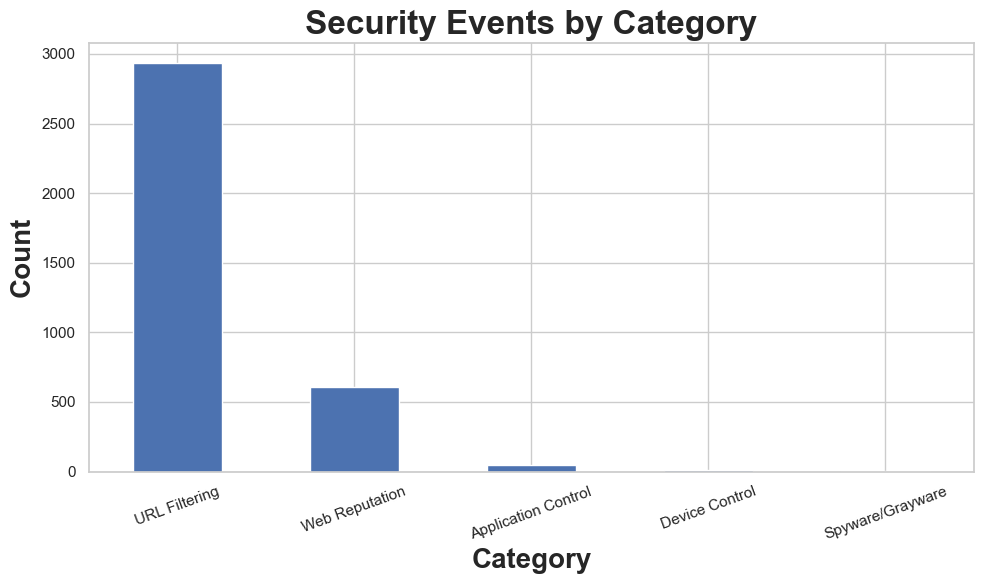

In [5]:
# 3. Category Analysis
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Security Events by Category', fontsize = 24, fontweight = "bold")
plt.xlabel("Category", fontsize = 20, fontweight = "bold")
plt.ylabel("Count", fontsize = 20, fontweight = "bold")
plt.xticks(rotation=20)
plt.tight_layout()

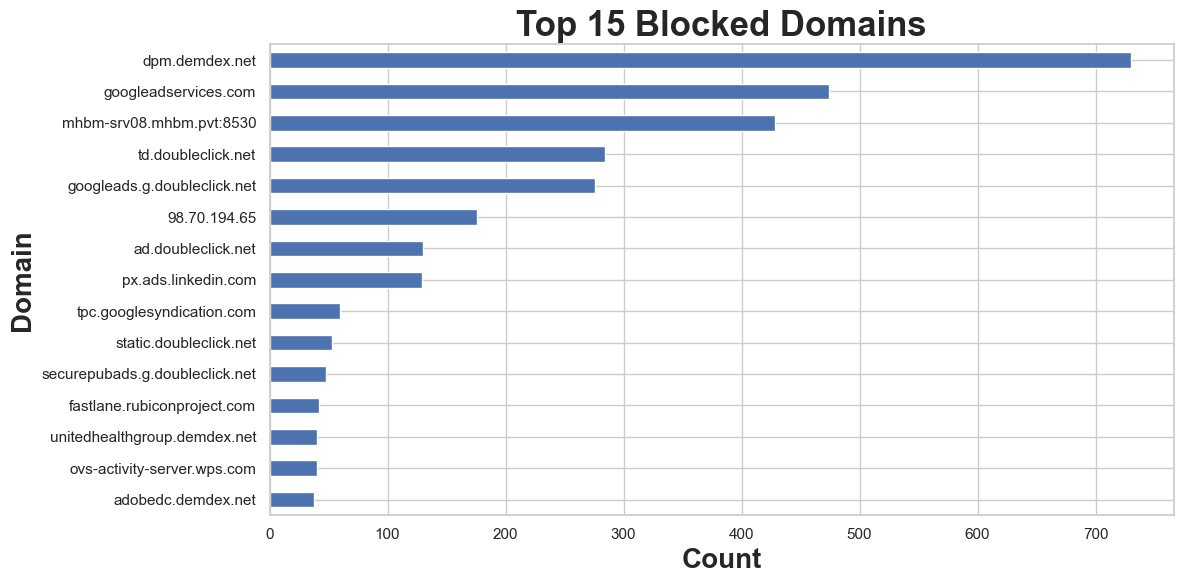

In [6]:
# 4. Top Domains Blocked
top_domains = df['Domain'].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_domains.plot(kind='barh')
plt.title('Top 15 Blocked Domains', fontsize = 25, fontweight = "bold")
plt.xlabel("Count", fontsize = 20, fontweight = "bold")
plt.ylabel("Domain", fontsize = 20, fontweight = "bold")
plt.gca().invert_yaxis()
plt.tight_layout()

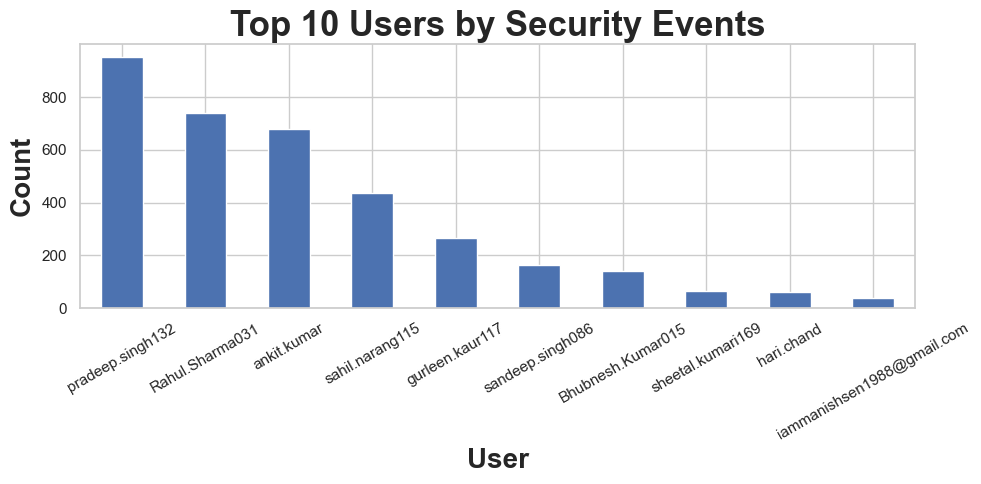

In [7]:
# 5. User Analysis
top_users = df['User'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_users.plot(kind='bar')
plt.title('Top 10 Users by Security Events', fontsize = 25, fontweight = "bold")
plt.xticks(rotation = 30)
plt.xlabel("User", fontsize = 20, fontweight = "bold")
plt.ylabel('Count', fontsize = 20, fontweight = "bold")
plt.tight_layout()

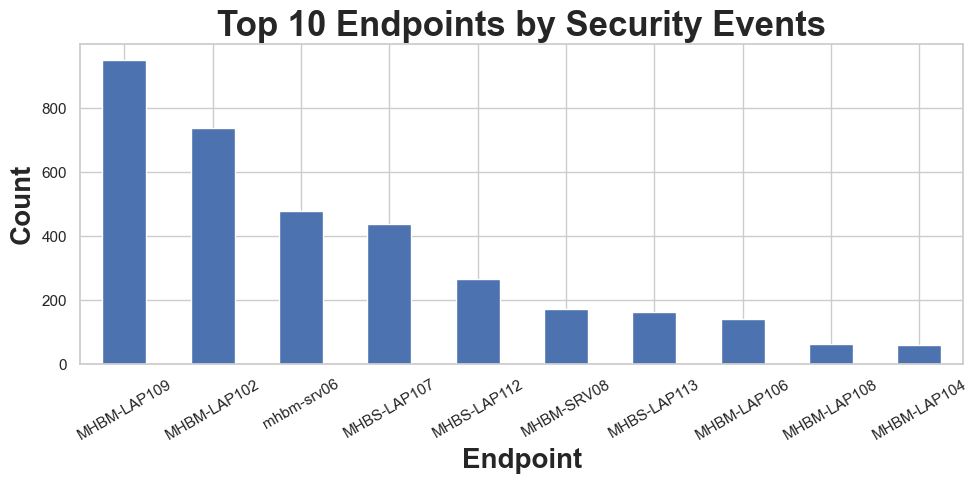

In [8]:
# 6. Endpoint Analysis
top_endpoints = df['Endpoint'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_endpoints.plot(kind='bar')
plt.title('Top 10 Endpoints by Security Events', fontweight = "bold", fontsize = 25)
plt.xlabel("Endpoint", fontsize = 20, fontweight = "bold")
plt.ylabel('Count', fontsize = 20, fontweight = "bold")
plt.xticks (rotation = 30)
plt.tight_layout()

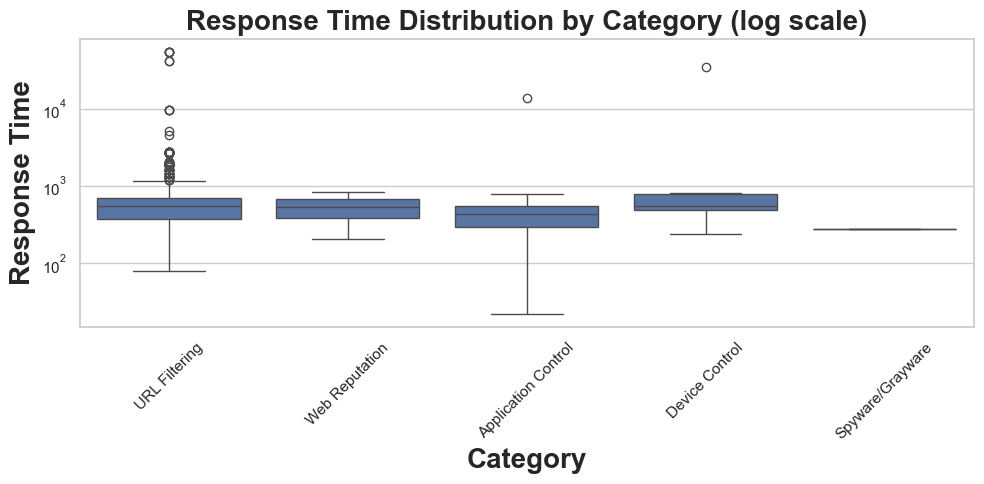

In [9]:
# 7. Response Time Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category', y='Response_Time')
plt.yscale('log')  # Using log scale due to outliers
plt.title('Response Time Distribution by Category (log scale)', fontsize = 20, fontweight = "bold")
plt.xlabel("Category", fontsize = 20, fontweight = "bold")
plt.ylabel('Response Time', fontsize = 20, fontweight = "bold")
plt.xticks(rotation=45)
plt.tight_layout()

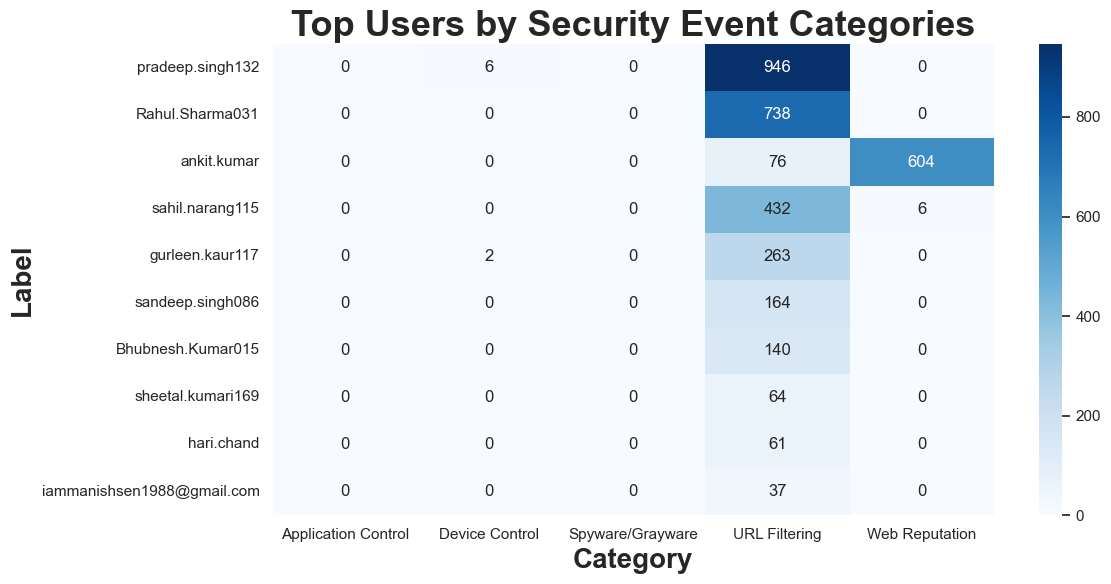

In [10]:
# 8. Cross Analysis - Users vs Categories
user_cat_matrix = df.groupby(['User', 'Category']).size().unstack().fillna(0)
top_users = user_cat_matrix.sum(axis=1).sort_values(ascending=False).head(10).index
user_cat_matrix = user_cat_matrix.loc[top_users]

plt.figure(figsize=(12, 6))
sns.heatmap(user_cat_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Top Users by Security Event Categories', fontweight = "bold", fontsize = 26)
plt.xlabel("Category", fontsize = 20, fontweight = "bold")
plt.ylabel('Label', fontsize = 20, fontweight = "bold")
plt.tight_layout()

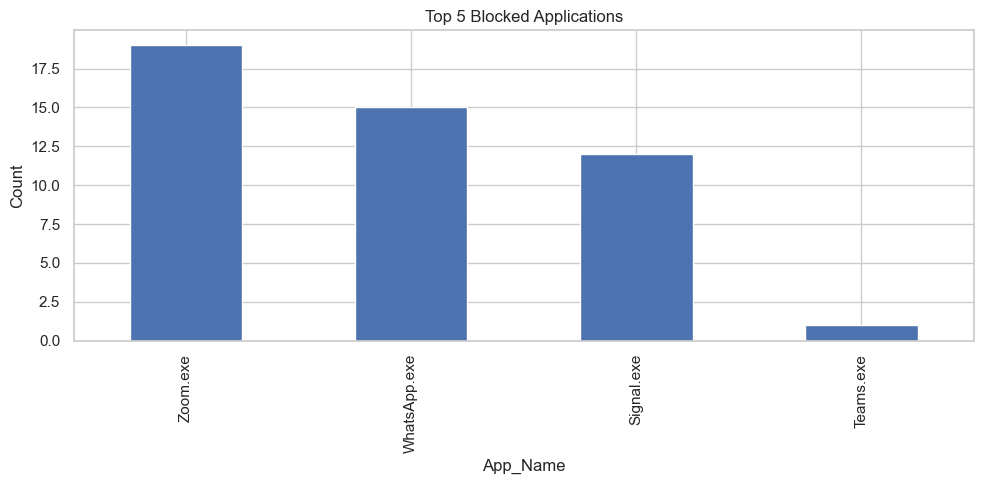

In [11]:
# 9. File Path Analysis for Application Control
app_control = df[df['Category'] == 'Application Control']
if not app_control.empty:
    app_control['App_Name'] = app_control['File Path/Target'].str.extract(r'([^\\]+)$')
    top_apps = app_control['App_Name'].value_counts().head(5)
    
    plt.figure(figsize=(10, 5))
    top_apps.plot(kind='bar')
    plt.title('Top 5 Blocked Applications')
    plt.ylabel('Count')
    plt.tight_layout()

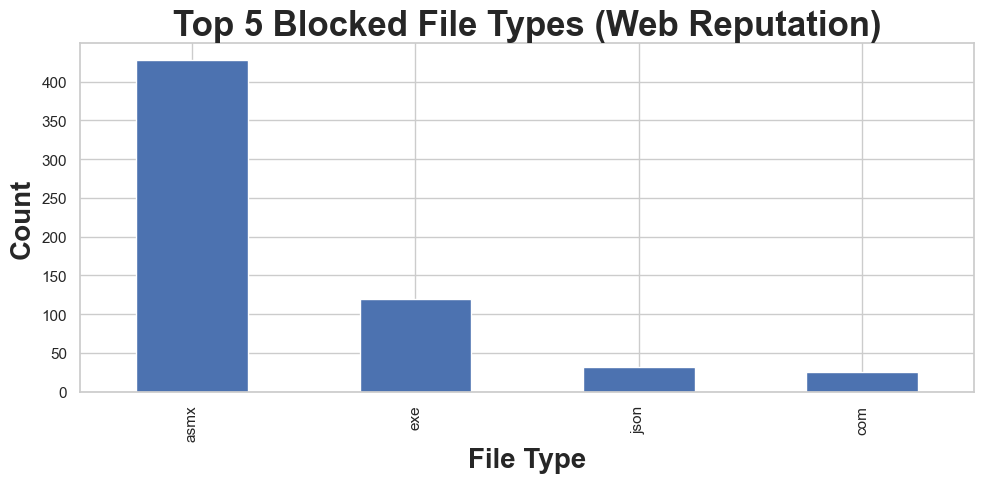

In [12]:
# 10. Web Reputation Analysis
web_rep = df[df['Category'] == 'Web Reputation']
if not web_rep.empty:
    web_rep['File_Type'] = web_rep['Threat/Violation'].str.extract(r'\.([a-zA-Z0-9]+)(?:\?|$)')
    top_file_types = web_rep['File_Type'].value_counts().head(5)
    
    plt.figure(figsize=(10, 5))
    top_file_types.plot(kind='bar')
    plt.title('Top 5 Blocked File Types (Web Reputation)', fontweight = "bold", fontsize = 25)
    plt.xlabel("File Type", fontsize = 20, fontweight = "bold")
    plt.ylabel('Count', fontsize = 20, fontweight = "bold")
    plt.tight_layout()

In [13]:
# Generate a summary report
with open('security_analysis_report.txt', 'w') as f:
    f.write("=== Security Risk Detections Analysis Report ===\n\n")
    f.write(f"Analysis Period: {df['Received'].min()} to {df['Received'].max()}\n")
    f.write(f"Total Events: {len(df)}\n\n")
    
    f.write("=== Category Distribution ===\n")
    f.write(str(df['Category'].value_counts()) + "\n\n")
    
    f.write("=== Top 10 Users Generating Events ===\n")
    f.write(str(df['User'].value_counts().head(10)) + "\n\n")
    
    f.write("=== Top 10 Blocked Domains ===\n")
    f.write(str(df['Domain'].value_counts().head(10)) + "\n\n")
    
    f.write("=== Response Time Statistics (seconds) ===\n")
    f.write(str(df['Response_Time'].describe()) + "\n\n")
    
    if not app_control.empty:
        f.write("=== Top Blocked Applications ===\n")
        f.write(str(app_control['App_Name'].value_counts().head(5)) + "\n\n")
    
    if not web_rep.empty:
        f.write("=== Web Reputation Blocks ===\n")
        f.write(f"Total: {len(web_rep)}\n")
        f.write(f"Top IPs: {web_rep['Threat/Violation'].str.extract(r'http://([^/]+)')[0].value_counts().head(3)}\n")
        f.write(f"File Types: {web_rep['File_Type'].value_counts().head(5)}\n")